In [83]:
import numpy as np
from scipy.integrate import odeint
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
%matplotlib notebook

# Dynamique du solide 
# Simple Pendule
..codeauthor:: Emile Roux <emile.roux@univ-smb.fr>
<img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Pendulum-no-text.gif" width="200" >

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Equation-of-mouvement" data-toc-modified-id="Equation-of-mouvement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Equation of mouvement</a></span><ul class="toc-item"><li><span><a href="#Equilibrimum-position" data-toc-modified-id="Equilibrimum-position-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Equilibrimum position</a></span></li><li><span><a href="#Lineraization-of-the-equation" data-toc-modified-id="Lineraization-of-the-equation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Lineraization of the equation</a></span></li><li><span><a href="#First-order-derivative-function-formalization" data-toc-modified-id="First-order-derivative-function-formalization-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>First order derivative function formalization</a></span></li></ul></li><li><span><a href="#Take-the-non-lineare-equation-into-account" data-toc-modified-id="Take-the-non-lineare-equation-into-account-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Take the non-lineare equation into account</a></span></li><li><span><a href="#Phase-plan" data-toc-modified-id="Phase-plan-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Phase plan</a></span></li><li><span><a href="#Duffing--#-Under-dev" data-toc-modified-id="Duffing--#-Under-dev-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Duffing  # Under dev</a></span></li></ul></div>

## Equation of mouvement

0. Express the equation of motion using the theorem of conservation of the mecanidal energy. 

_Solution:_ 

Masse velocity : $v=l\dot{\theta}$


$$
E_m = E_c + E_p
$$

with $E_c = \dfrac{1}{2} m l^2 \dot{\theta}^2$,

and $E_p = mgl(1-cos(\theta))$

$$
E_m = \dfrac{1}{2} m l^2 \dot{\theta}^2 + mgl(1-cos(\theta))
$$

$E_m$ is constante over time: $\dfrac{d E_m}{dt} = 0$

$$
\dfrac{d E_m}{dt} = m l^2 \dot{\theta} \ddot{\theta} +  mgl\dot{\theta}sin(\theta) = 0
$$

By dividing by $ml\dot{\theta}$
$$
\ddot{\theta} + \dfrac{g}{l} sin(\theta) = 0 
$$

$\omega_0^2 = \dfrac{g}{l}$

In [311]:
# Numerical value
g = 9.81
l = 9.91
m = 1

### Equilibrimum position
$\theta_{eq}$ is a equilibrium position if $\dfrac{d E_{p}}{d\theta} (\theta_{eq})= 0$

1. Find equilibrium postion analyticaly. Howmany equilibrium position can be found ?


An equilbrium position $\theta_{eq}$ is stable if  $\dfrac{d^2 E_{p}}{d\theta^2} (\theta_{eq})> 0$

2. Which équilibrium position is stable ?.


3. Verify graphicaly the found solutions.

<IPython.core.display.Javascript object>


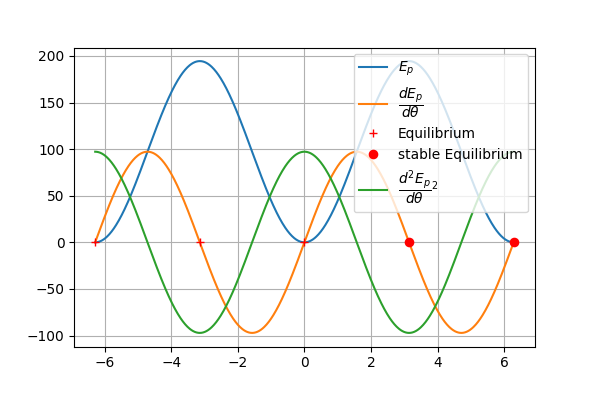

In [312]:
# Solution
def E_p(theta):
    return m*g*l*(1-np.cos(theta))

def diff_E_p(theta):
    return m*g*l*(np.sin(theta))

def diff2_E_p(theta):
    return m*g*l*(np.cos(theta))



theta= np.deg2rad(np.linspace(-360, 360, 741))
dEp = diff_E_p(theta)
dEp2 = diff2_E_p(theta)

theta_eq = theta[np.abs(dEp)<0.01]
dEp2_eq = theta[np.abs(dEp)<0.01]
theta_stab = theta_eq[dEp2_eq>0]

plt.figure()
plt.plot(theta, E_p(theta), label='$E_p$')
plt.plot(theta, dEp, label=r'$\dfrac{d E_{p}}{d\theta} $')
plt.plot(theta_eq, np.zeros_like(theta_eq),'+r', label='Equilibrium')
plt.plot(theta_stab, np.zeros_like(theta_stab),'or', label='stable Equilibrium')
plt.plot(theta, dEp2, label=r'$\dfrac{d^2 E_{p}}{d\theta}^2 $')
plt.legend()
plt.grid()

### Lineraization of the equation

4. Write the equation of mouvement in the case of small variation of $\theta$

_Solution :_

if $\theta << 1$, then $sin(\theta) \approx \theta$.
The equation of movement becoms :
$$
\ddot{\theta} + \dfrac{g}{l} \theta = 0 
$$

### First order derivative function formalization
5. Formulate the above equation as a first order lineare equation ? Definine the $f(X)$ function. Implement this function
$$
\dot X = f(X)
$$

6. Whate variable are in the state vector X ? 





In [313]:
# Derivative function
def diff_linearized(X,t):
    theta,theta_p = X
    Xp = 0*X
    return Xp

_Solution :_
$$
\begin{bmatrix}
\dot \theta \\
\ddot \theta 
\end{bmatrix}
=
\begin{bmatrix}
\dot \theta \\
\dfrac{g}{l} \theta
\end{bmatrix}
$$

In [314]:
# Derivative function
def diff_linearized(X,t):
    theta,theta_p = X
    return np.array([theta_p, -g/l * theta])

7. Solve the obtain ode using odeint. Take $\theta$ = 10° and zero velovity as initial condition.

In [315]:
# time vector :
t = np.linspace(..., ..., ...)

# Initial condition :
X0 = [..., ...]

# solve the ODE
sol_lin = odeint(..., X0, t)

# Plot
plt.figure()
plt.plot(t,sol_lin[:,0], label=r'$\theta$')
plt.plot(t,sol_lin[:,1], label=r'$\dot \theta$')
plt.xlabel('$x[s]$')
plt.grid()
plt.legend()

TypeError: 'ellipsis' object cannot be interpreted as an integer

<IPython.core.display.Javascript object>


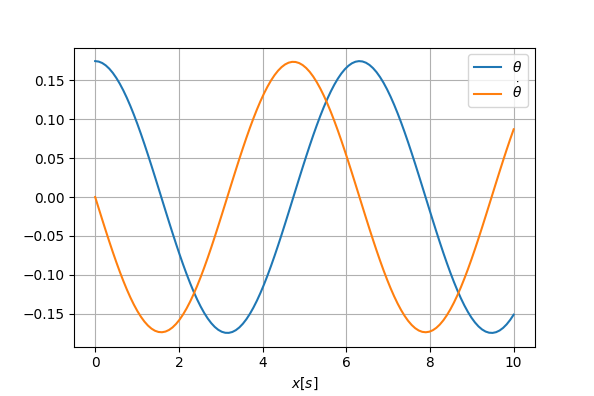

In [316]:
# Solution
t = np.linspace(0, 10, 120)
X0 = [np.deg2rad(10), 0.]
sol_lin = odeint(diff_linearized, X0, t)

plt.figure()
plt.plot(t,sol_lin[:,0], label=r'$\theta$')
plt.plot(t,sol_lin[:,1], label=r'$\dot \theta$')
plt.xlabel('$x[s]$')
plt.grid()
plt.legend()

## Take the non-lineare equation into account

8. Formulate the non linear equation as a first order lineare equation ? Definine the $f(X)$ function. Implement this function

_Solution :_
$$
\begin{bmatrix}
\dot \theta \\
\ddot \theta 
\end{bmatrix}
=
\begin{bmatrix}
\dot \theta \\
\dfrac{g}{l} sin(\theta)
\end{bmatrix}
$$

In [90]:
# fonction de dérivée
def diff(X,t):
    Xp=...
    return Xp

In [101]:
# Solution
# fonction de dérivée
def diff(X,t):
    theta,theta_p = X
    return np.array([theta_p, -g/l * np.sin(theta)])

9. Compare result of the linearized solution and of the non linear one. In wich case differents are significant ?

In [ ]:
# time vector :
t = np.linspace(..., ..., ...)

# Initial condition :
X0 = [..., ...]

# solve the ODE
sol_lin = odeint(..., X0, t)
sol = odeint(..., X0, t)

# Plot
plt.figure()
...
plt.xlabel('$x[s]$')
plt.grid()
plt.legend()

In [108]:
t = np.linspace(0, 10, 120)
X0 = [np.deg2rad(50), 0.]
sol = odeint(diff, X0, t)
sol_lin = odeint(diff_linearized, X0, t)

<IPython.core.display.Javascript object>


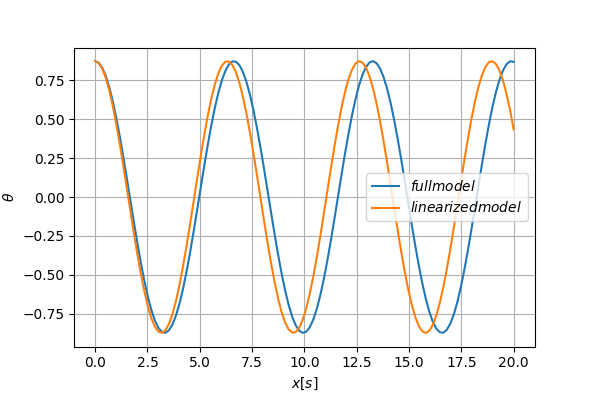

In [107]:
plt.figure()
plt.plot(t,sol[:,0], label=r'$full model$')
plt.plot(t,sol_lin[:,0], label=r'$linearized model$')
plt.xlabel('$x[s]$')
plt.ylabel(r'$\theta$')
plt.grid()
plt.legend()

## Phase plan
10. Plot the evolution of state variables for both model in the phase plan ($\theta$,$\dot \theta$). 

* With initial conditions : $\theta = 50°$, $\dot \theta = 0$
* With initial conditions : $\theta = 0°$, $\dot \theta = 100 [°/s]$
* With initial conditions : $\theta = 0°$, $\dot \theta = 115 [°/s]$

Comment ?

In [146]:
# Solution
t = np.linspace(0, 10, 120)
X0 = np.deg2rad([0., 115])
sol = np.rad2deg(odeint(diff, X0, t))
sol_lin = np.rad2deg(odeint(diff_linearized, X0, t))

<IPython.core.display.Javascript object>


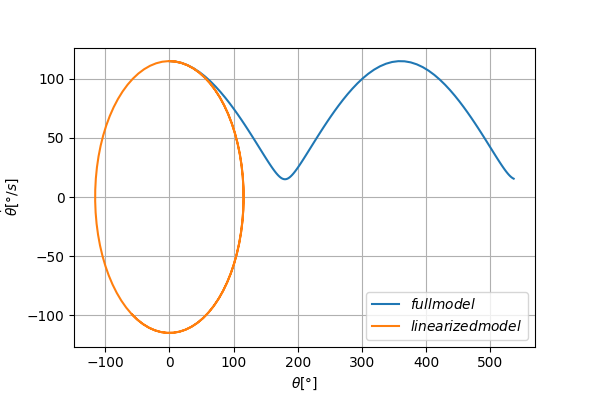

In [147]:
plt.figure()
plt.plot(sol[:,0],sol[:,1], label=r'$full model$')
plt.plot(sol_lin[:,0],sol_lin[:,1], label=r'$linearized model$')
plt.ylabel(r'$\dot \theta [°/s]$')
plt.xlabel(r'$\theta [°]$')
plt.grid()
plt.legend()

## Duffing  # Under dev

<IPython.core.display.Javascript object>


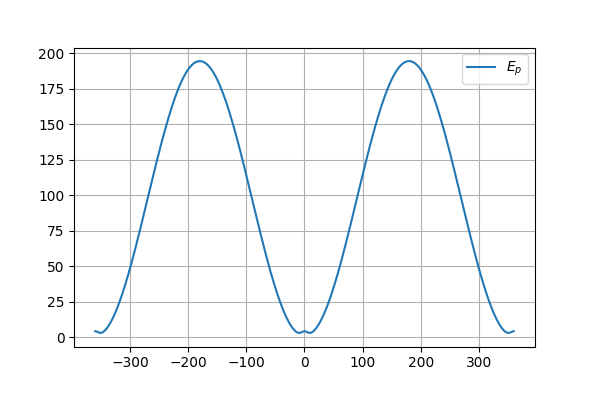

In [307]:
rep = 1e2

# Solution
def E_p(theta):
    d = l*np.sqrt((1-np.cos(theta)+2/10.)** 2 +  np.sin(theta)**2)
    return m*g*l*(1-np.cos(theta)) + rep/3. * (1/d)**3


theta= np.deg2rad(np.linspace(-360, 360, 741))


plt.figure()
plt.plot(np.rad2deg(theta), E_p(theta), label='$E_p$')

plt.legend()
plt.grid()

_Solution :_
$$
\begin{bmatrix}
\dot \theta \\
\ddot \theta 
\end{bmatrix}
=
\begin{bmatrix}
\dot \theta \\
-\dfrac{g}{l} sin(\theta) + \dfrac{rep}{d^4}
\end{bmatrix}
$$

In [308]:
# Solution
# fonction de dérivée
def diff_duff(X,t):
    theta,theta_p = X
    d = l*np.sqrt((1-np.cos(theta)+2/10.)** 2 +  np.sin(theta)**2)
    return np.array([theta_p, -g/l * np.sin(theta) + rep * d**-4])

In [309]:
# Solution
t = np.linspace(0, 50, 1200)
X0 = np.deg2rad([175., 0.])
sol = np.rad2deg(odeint(diff_duff, X0, t))

<IPython.core.display.Javascript object>


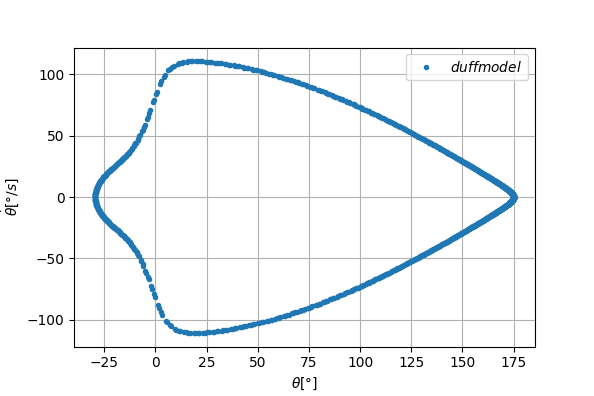

In [310]:
plt.figure()
plt.plot(sol[:,0],sol[:,1],'.', label=r'$duff model$')

plt.ylabel(r'$\dot \theta [°/s]$')
plt.xlabel(r'$\theta [°]$')
plt.grid()
plt.legend()